<a href="https://colab.research.google.com/github/sergeymasl/pandas_cource/blob/main/Grouping_and_Sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grouping and Sorting**

Фунции для преобразования каждого элемента (Maps) преобразуют каждый отдельный элемент, но часто нам совершить операцию над группой элементов (найти сумму, среднее и т.п)

В этом уроке мы научимся делать операции на группой данных с методом ```groupby()```, взглянем на более сложные способы индексации данных и изучим методы сортировки данных.

Для демонстрации мы будем использовать датасет с данными о винах.

In [1]:
# импорт библиотеки
import pandas as pd
# загрузка датасета для дальнейшей работы
reviews = pd.read_csv("https://drive.google.com/uc?export=download&id=1z-1idT4mGbOvHgmEPzneqV54EJ1-w7tk", index_col=0)
# настройки по отображению строк
pd.set_option('max_rows', 5)

## **Группировка данных**

Рассмотрим функцию которую мы уже использовали ```value_counts()```, она как раз использует в своей работе группировку данных. Мы можем повторить эффект этой функции самостоятельно, используя метод ```group_by()```:

In [ ]:
reviews.groupby('points')['points'].count()

Out:

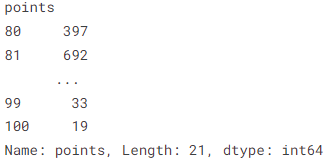

```groupby()``` создала группу из строк у которых одинаковое поле ```points```. Затем в каждой из этих строк мы взяли столбец ```points``` и посчитали количество записей в каждой группе (функция ```count```)

Для большей информативности изобразим ту же операцию на малом наборе данных:

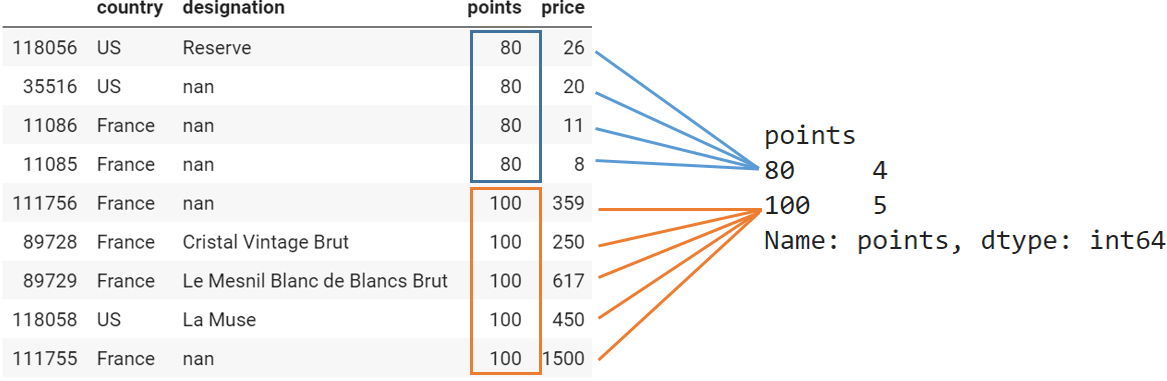


Поэтому функция ```value_counts()``` является быстрым вызовом операции группировки которую мы сделали выше.

Вы можете использовать функции для сводной информации, которые мы использовали ранее. Например найдем минимальную цену в каждой группе по полю ```points```:

In [31]:
reviews.groupby('points')['price'].min()

points
80      5.0
81      5.0
       ... 
99     44.0
100    80.0
Name: price, Length: 21, dtype: float64

Out:

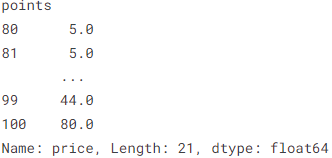

Вы можете думать о каждой группе как о срезе из DataFrame, в котором собраны совпадающие значения. То есть о n-м количестве строк, в которых совпадают значения в одном или нескольких полях (о нескольких чуть ниже) или другими словами, маленькие DataFrame. 

Соответственно, можно использовать эту особенность для написания собственных функций, например, вот как получить первое название вина для кажой винодельни, использую метод ```apply()```:

In [34]:
def first_wine(df_group):
  # т.к. каждая из групп является набором строк (маленьким DataFrame), то мы можем использовать те же особенности
  # вернем столбец title из первой строки
  return df_group['title'].iloc[0]

reviews.groupby('winery').apply(first_wine)

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

Out:

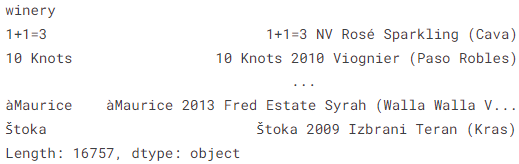

И то же самое с помощью ```lambda```:

In [35]:
reviews.groupby('winery').apply(lambda df_group: df_group['title'].iloc[0])

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

Для более гибкого контроля в анализе, вы можете группировать данные по нескольким столбцам. Например, вот как мы получим всю информацию о вине с самыми высокими оценками в каждой стране и провинции в этой стране:

In [41]:
reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df['points'].idxmax()])
# groupby(['country', 'province']) - группировка по стране и провинции
# df['points'].idxmax() - поиск индекса с максимальным баллом (в данном случае поиск максимального балла в гуппе строк)
# df.loc[df['points'].idxmax()] - получение строки с индексом полученном при df['points'].idxmax()

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
...                               ...   
Uruguay   San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
...                                                                       ...   
Uruguay   San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                          designation  points  price  \
country   province                                                     
Argentina Mendoza Province           Nicasia Vineyard      97  120.0   
          Other                               Reserva      95   90.0   
...                                               ...     ...    ...   
Uruguay   San Jose           El Preciado Gran Reserva      87   50.0   
          Uruguay           Blend 002 Limited Edition      91   22.0   

                                    province region_1 region_2  \
country   province                                               
Argentina Mendoza Province  Mendoza Province  Mendoza      NaN   
          Other                        Other    Salta      NaN   
...                                      ...      ...      ...   
Uruguay   San Jose                  San Jose      NaN      NaN   
          Uruguay                    Uruguay      NaN      NaN   

                                  taster_name taster_twitter_handle  \
country   province                                                    
Argentina Mendoza Province  Michael Schachner           @wineschach   
          Other             Michael Schachner           @wineschach   
...                                       ...                   ...   
Uruguay   San Jose          Michael Schachner           @wineschach   
          Uruguay           Michael Schachner           @wineschach   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
...                                                                       ...   
Uruguay   San Jose          Castillo Viejo 2005 El Preciado Gran Reserva R...   
          Uruguay           Narbona NV Blend 002 Limited Edition Tannat-Ca...   

                                          variety                winery  
country   province                                                       
Argentina Mendoza Province                 Malbec  Bodega Catena Zapata  
          Other                            Malbec                Colomé  
...                                           ...                   ...  
Uruguay   San Jose                      Red Blend        Castillo Viejo  
          Uruguay           Tannat-Cabernet Franc               Narbona  

[425 rows x 13 columns]

Еще один метод испольуемый с ```groupby()```, о котором стоит упомянуть это метод ```agg()```. С помощью которого можно использовать несколько функций для каждой группы. Например, вот как мы можем посмотреть простую статистику по ценам в каждой стране:

In [ ]:
# len в данном случае это len(df_group) то есть количество строк в каждой группе 
reviews.groupby(['country']).price.agg([len, min, max])

Out:

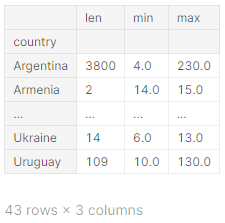

[Документация](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) по ```groupby().agg()```

## **Мульти-индексы**

Во всех примерах рассмотренных ранее мы использовали простые индексы (```simple_label index```). Результаты работы с ```groupby()``` иногда приводят к мульти-индексу.

Мульти-индекс отличается от обычного, тем что имеет несколько уровней. 

Например:

In [48]:
countries_reviewed = reviews.groupby(['country', 'province'])['description'].agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
...                          ...
Uruguay   San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [49]:
mi = countries_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

Мульти-индексы имеют несколько методов работы с их многоуровневой структурой, которые отсутствуют для одномерных индексов.
При вызове значения из DataFrame с мульти-индексом, необходимо указывать нескольких уровней индексов: 


In [59]:
countries_reviewed.loc[('Argentina', 'Mendoza Province')]

len    3264
Name: (Argentina, Mendoza Province), dtype: int64

Больше информации о использовании мульти-индексов и методов работы с ними описаны в [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

Однако, метод, который вы будете чаще всего использовать при работе с мульти индексами это ```reset_index()```, он преобразует мульти-индекс в несоклько столбцов:

In [60]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


## **Сортировка**

Давайте опять взлянем на ```countries_reviewed```, мы видем что при группировке данные выводятся отсортированными по индексу, а не по значениям. Так выводятся результаты при использовании ```groupby```.

Чтобы получить данные отсортированные в том порядке который мы хотим, используется метод ```sort_values()```. Например, отсортируем по возрастанию количества строк в группах в ```countries_reviewed```:

In [61]:
countries_reviewed.sort_values(by='len')

len
country province                    
Greece  Muscat of Kefallonian      1
        Sterea Ellada              1
...                              ...
US      Washington              8639
        California             36247

[425 rows x 1 columns]

По умолчанию ```sort_values()``` сортирует по возрастанию, когда самые малые значения идут первыми. 
А вот как измененить сортировку от *по возрастанию* на *по убыванию*: 

In [62]:
countries_reviewed.sort_values(by='len', ascending=False)

len
country province         
US      California  36247
        Washington   8639
...                   ...
Chile   Coelemu         1
Greece  Beotia          1

[425 rows x 1 columns]

Вы также всегда можете отсортировать данные по индексам, используя метод ```sort_index()```, этот метод имеет те же аргументы:

In [64]:
countries_reviewed.sort_index(ascending=False)

len
country   province              
Uruguay   Uruguay             24
          San Jose             3
...                          ...
Argentina Other              536
          Mendoza Province  3264

[425 rows x 1 columns]

Наконец вы можете сортировать по нескольким столбцам одновременно:

In [65]:
# преобразуем мульти индекс в несколько столбцов для демонстрации
countries_reviewed_reset = countries_reviewed.reset_index()
# сортирируем по столбцам 'country' и 'len'
countries_reviewed_reset.sort_values(by=['country', 'len'])

,country,province,len
1,Argentina,Other,536
0,Argentina,Mendoza Province,3264
...,...,...,...
424,Uruguay,Uruguay,24
419,Uruguay,Canelones,43


А теперь отсортируем столбцец ```country``` по возрастанию, а столбец ```len``` по убыванию:

In [66]:
countries_reviewed_reset.sort_values(by=['country', 'len'], ascending=[True, False])

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
418,Uruguay,Atlantida,5
423,Uruguay,San Jose,3
